# Modes membrane 2D

Le but de l'exercice est de caractériser les modes de vibration $u_k(x,y)$ selon Oz d'une membrane
rectangulaire de faible épaisseur. Dans la limite des faibles amplitudes de vibration, 
ils sont solutions de l'équation d'Helmholtz stationnaire :

$$
\partial_x^2 \; u_k + \partial_y^2 \; u_k + k^2 \; u_k=0
$$

On considère que la membrane rectangulaire est fixée sur ses quatre cotés.

## Exercice :
faire une copie du programme suivant et modifier-le pour mettre en oeuvre la technique du slicing pour construire `Kp` et les vecteurs solutions
qui est plus efficace que celle utilisant les matrices de projection `P`.

Using matplotlib backend: module://matplotlib_inline.backend_inline
(4096, 3)


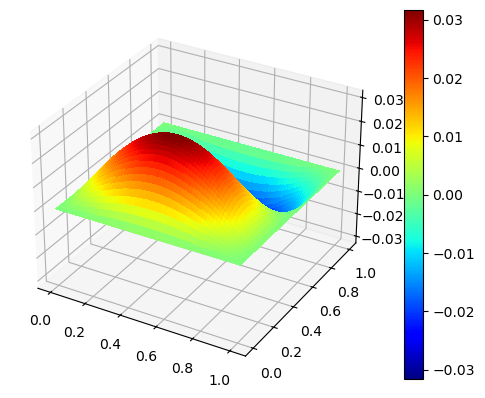

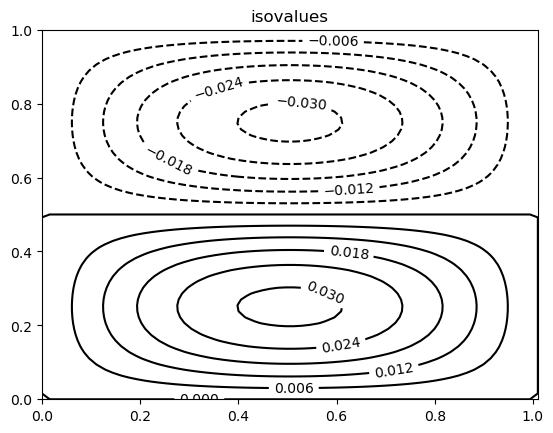

In [4]:
#%matplotlib inline
%matplotlib
import scipy
from scipy import sparse
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt

class Fdm:
    'grille differences finies'
    fdmCount = 0

    def __init__(self, Lx, Ly, Nx, Ny):
        self.Lx = Lx
        self.Ly = Ly
        self.Nx = Nx
        self.Ny = Ny 
        self.N  = Nx*Ny
        self.dx = Lx/(Nx-1);
        self.dy = Ly/(Ny-1);
        Fdm.fdmCount += 1
   
    def displayCount(self):
        """nombre d'instances"""
        print ("Instances {:d}".format(Fdm.fdmCount)) 
            
    def index(self, i, j):
        """numerotation unique des sites (i,j)"""
        return self.Nx*j+i
    
    def __dirichlet(self):
        """conditions de dirichlet u=0"""
        self.ld = self.index(np.arange(self.Nx), 0) 
        ld = self.index(np.arange(self.Nx), self.Ny-1)
        self.ld=np.hstack((self.ld, ld))
        ld = self.index(0, np.arange(self.Ny))
        self.ld=np.hstack((self.ld, ld))
        ld = self.index(self.Nx-1, np.arange(self.Ny))
        self.ld=np.hstack((self.ld, ld))                  
        self.ld=np.unique(self.ld)
        
            
    def __build_K(self):
        """Construction de la matrice K"""    
        row  = []
        col  = []
        data = []

        D=1/self.dx**2+1/self.dy**2;
        
        for ix in range(self.Nx):
            for iy in range(self.Ny):
                n=self.index(ix, iy)  
                if n in self.ld: # test d'appartenance
                    continue
                else:
                    row.append(n)
                    col.append(n)
                    data.append(2*D)
                    
                    p=self.index(ix+1, iy)
                    row.append(n)
                    col.append(p)
                    data.append(-1/self.dx**2)

                    p=self.index(ix-1, iy)
                    row.append(n)
                    col.append(p)
                    data.append(-1/self.dx**2)
                    
                    p=self.index(ix, iy+1)
                    row.append(n)
                    col.append(p)
                    data.append(-1/self.dy**2)
                    
                    p=self.index(ix, iy-1)
                    row.append(n)
                    col.append(p)
                    data.append(-1/self.dy**2)

        # matrice creuse K au format Compressed Sparse Row            
        K=sparse.csr_matrix( (data,(row,col)), shape=(self.N, self.N) )
        return K

    def solve(self, n):
        self.__dirichlet();
        K = self.__build_K();
        UN= np.ones(self.N)
        P=sparse.diags(UN).tocsr()
        P=delete_rows(P, fdm.ld)
        
        Kp=P @ K @ P.T
        vals, vecs = sparse.linalg.eigsh(Kp, k=n, which='SM')
        vecs_full = P.T*vecs
        print(vecs_full.shape)
        
        plt.close('all')
        fig = plt.figure(1)
        ax = fig.add_subplot(111, projection='3d')
        X = np.linspace(0, self.Lx, num=self.Nx, endpoint=True)
        xlen = len(X)
        Y = np.linspace(0, self.Ly, num=self.Ny, endpoint=True)
        ylen = len(Y)
        X, Y = np.meshgrid(X, Y)
        Z = vecs_full[:, n-1].reshape(self.Nx, self.Ny)

        colortuple = ('y', 'b')
        colors = np.empty(X.shape, dtype=str)
        
        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet',
                       linewidth=0, antialiased=False)

        fig.colorbar(surf)
        plt.show()

        plt.figure(2)
        CS = plt.contour(X, Y, Z, 11,
                 colors='k',  # negative contours will be dashed by default
                 )
        plt.clabel(CS, inline=1, fontsize=10)
        plt.title('isovalues')

        plt.show()

def delete_rows(mat, indices):
    valid = isinstance(mat, scipy.sparse.lil_matrix) or \
            isinstance(mat, scipy.sparse.csr_matrix)
    if not valid:
        raise ValueError("works only for LIL / CSR format -- use .tolil() / .tocsr() first")
    indices = list(indices)
    mask = np.ones(mat.shape[0], dtype=bool)
    mask[indices] = False
    return mat[mask]


fdm = Fdm(1.01, 1, 64, 64)
fdm.solve(3)


# SOLUTION

Using matplotlib backend: module://matplotlib_inline.backend_inline
[[0.         0.01603175 0.03206349 ... 0.97793651 0.99396825 1.01      ]
 [0.         0.01603175 0.03206349 ... 0.97793651 0.99396825 1.01      ]
 [0.         0.01603175 0.03206349 ... 0.97793651 0.99396825 1.01      ]
 ...
 [0.         0.01603175 0.03206349 ... 0.97793651 0.99396825 1.01      ]
 [0.         0.01603175 0.03206349 ... 0.97793651 0.99396825 1.01      ]
 [0.         0.01603175 0.03206349 ... 0.97793651 0.99396825 1.01      ]]
[ 0.00015756  0.00031472  0.00047111 ... -0.00047111 -0.00031472
 -0.00015756]


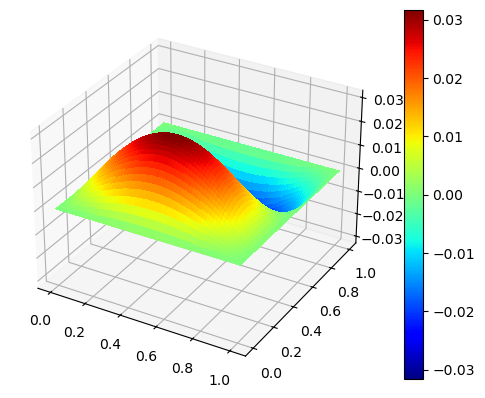

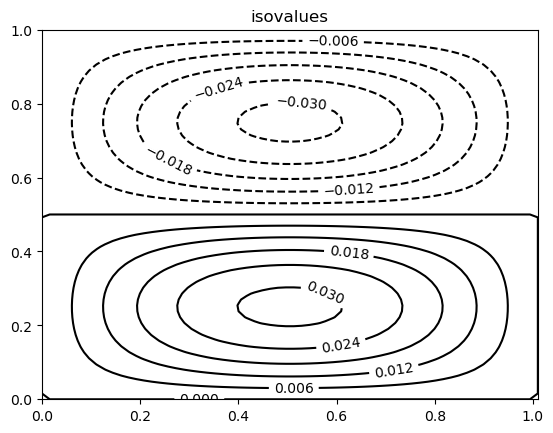

In [3]:
#%matplotlib inline
%matplotlib
import scipy
from scipy import sparse
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt

class Fdm:
    'grille differences finies'
    fdmCount = 0

    def __init__(self, Lx, Ly, Nx, Ny):
        self.Lx = Lx
        self.Ly = Ly
        self.Nx = Nx
        self.Ny = Ny 
        self.N  = Nx*Ny
        self.dx = Lx/(Nx-1);
        self.dy = Ly/(Ny-1);
        Fdm.fdmCount += 1
   
    def displayCount(self):
        """nombre d'instances"""
        print ("Instances {:d}".format(Fdm.fdmCount)) 
            
    def index(self, i, j):
        """numerotation unique des sites (i,j)"""
        return self.Nx*j+i
    
    def __dirichlet(self):
        """conditions de dirichlet u=0"""
        self.ld = self.index(np.arange(self.Nx), 0) 
        ld = self.index(np.arange(self.Nx), self.Ny-1)
        self.ld=np.hstack((self.ld, ld))
        ld = self.index(0, np.arange(self.Ny))
        self.ld=np.hstack((self.ld, ld))
        ld = self.index(self.Nx-1, np.arange(self.Ny))
        self.ld=np.hstack((self.ld, ld))                  
        self.ld=np.unique(self.ld)
        
            
    def __build_K(self):
        """Construction de la matrice K"""    
        row  = []
        col  = []
        data = []

        D=1/self.dx**2+1/self.dy**2;
        
        for ix in range(self.Nx):
            for iy in range(self.Ny):
                n=self.index(ix, iy)  
                if n in self.ld: # test d'appartenance
                    continue
                else:
                    row.append(n)
                    col.append(n)
                    data.append(2*D)
                    
                    p=self.index(ix+1, iy)
                    row.append(n)
                    col.append(p)
                    data.append(-1/self.dx**2)

                    p=self.index(ix-1, iy)
                    row.append(n)
                    col.append(p)
                    data.append(-1/self.dx**2)
                    
                    p=self.index(ix, iy+1)
                    row.append(n)
                    col.append(p)
                    data.append(-1/self.dy**2)
                    
                    p=self.index(ix, iy-1)
                    row.append(n)
                    col.append(p)
                    data.append(-1/self.dy**2)

        # matrice creuse K au format Compressed Sparse Row            
        K=sparse.csr_matrix( (data,(row,col)), shape=(self.N, self.N) )
        return K

    def solve(self, n):
        self.__dirichlet();
        K = self.__build_K();
        # seconde méthode plus efficace en utilisant le slicing
        all_dofs = range(self.N)
        free_dofs = [dof for dof in all_dofs if dof not in self.ld]
        Kp = K[free_dofs, :][:, free_dofs]
        
        vals, vecs = sparse.linalg.eigsh(Kp, k=n, which='SM')
        vecs_full = np.zeros(shape=(self.N, n))
        vecs_full[free_dofs, :] = vecs
        
        plt.close('all')
        fig = plt.figure(1)
        ax = fig.add_subplot(111, projection='3d')
        X = np.linspace(0, self.Lx, num=self.Nx, endpoint=True)
        xlen = len(X)
        Y = np.linspace(0, self.Ly, num=self.Ny, endpoint=True)
        ylen = len(Y)
        X, Y = np.meshgrid(X, Y)
        print(X)
        print(vecs[:, n-1])
        Z = vecs_full[:, n-1].reshape(self.Nx, self.Ny)

        colortuple = ('y', 'b')
        colors = np.empty(X.shape, dtype=str)
        
        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet',
                       linewidth=0, antialiased=False)

        fig.colorbar(surf)
        plt.show()

        plt.figure(2)
        CS = plt.contour(X, Y, Z, 11,
                 colors='k',  # negative contours will be dashed by default
                 )
        plt.clabel(CS, inline=1, fontsize=10)
        plt.title('isovalues')

        plt.show()

def delete_rows(mat, indices):
    valid = isinstance(mat, scipy.sparse.lil_matrix) or \
            isinstance(mat, scipy.sparse.csr_matrix)
    if not valid:
        raise ValueError("works only for LIL / CSR format -- use .tolil() / .tocsr() first")
    indices = list(indices)
    mask = np.ones(mat.shape[0], dtype=bool)
    mask[indices] = False
    return mat[mask]


fdm = Fdm(1.01, 1, 64, 64)
fdm.solve(3)
